In [11]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

יצירת הנתונים

In [12]:
X = np.linspace(0, 3, 300).reshape(-1, 1)
y = np.exp(X) + 0.15 * np.random.randn(*X.shape)  # מוסיפים קצת רעש


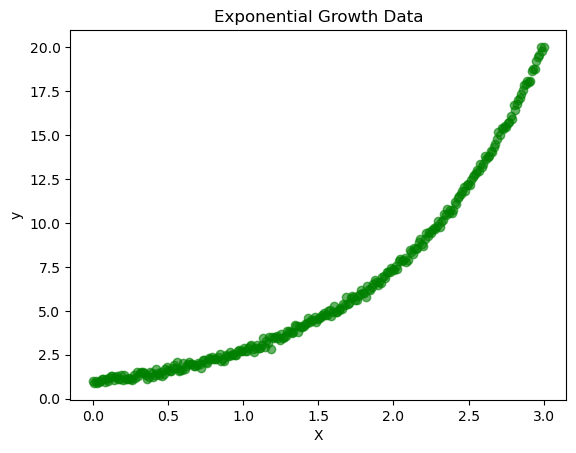

In [13]:
# use matplotlib to visualize the data
plt.scatter(X, y, color="green", alpha=0.6)
plt.title("Exponential Growth Data")
plt.xlabel("X")
plt.ylabel("y")
plt.show()


In [14]:
# חלוקת הנתונים לאימון ובדיקה
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# המרת הנתונים לטנסורים
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)


In [15]:
# הגדרת המודל
#נא להקפיד להגדיר גם שכבות וגם פונקציית עבודה קדימה בצורה מסודרת
class ExponentialRegressionModel(nn.Module):
    def __init__(self):
        super(ExponentialRegressionModel, self).__init__()
        self.fc1 = nn.Linear(1, 32)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(32, 16)
        self.fc3 = nn.Linear(16, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        return x


In [16]:
# יצירת אינסטנס של המודל

model = ExponentialRegressionModel()
# הגדרת פונקציית הפסד ואופטימיזר
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# לולאת אימון המודל כולל הדפסת ההפסד כל כ 100 צעדים
   
epochs = 1000
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()

    # תחזיות ואיבוד
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)

    # חישוב גרדיאנטים ועדכון משקלים
    loss.backward()
    optimizer.step()

    # הדפסת איבוד כל 100 אפוקים
    if epoch % 100 == 0:
        print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item()}")

    

Epoch 1/1000, Loss: 64.19715881347656
Epoch 101/1000, Loss: 1.4656713008880615
Epoch 201/1000, Loss: 0.13838252425193787
Epoch 301/1000, Loss: 0.060244712978601456
Epoch 401/1000, Loss: 0.036135002970695496
Epoch 501/1000, Loss: 0.02894474007189274
Epoch 601/1000, Loss: 0.02526862546801567
Epoch 701/1000, Loss: 0.023083437234163284
Epoch 801/1000, Loss: 0.022251196205615997
Epoch 901/1000, Loss: 0.02197764255106449


Root Mean Squared Error (RMSE): 0.1770


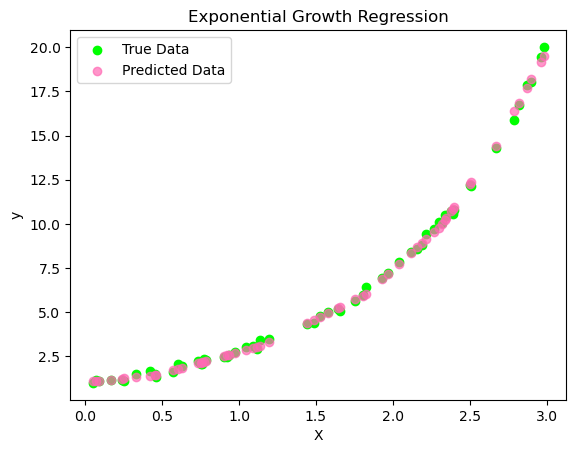

In [22]:
# הערכת המודל הסופי

# העברת המודל למצב הערכה (evaluation mode)
model.eval()

# מבצעים תחזיות על נתוני הבדיקה
with torch.no_grad():
    predictions = model(X_test_tensor)
# שימו לב - זו בעיית רגרסיה לכן יש לבדוק את המודל באמצעות 
# חישוב RMSE
rmse = torch.sqrt(criterion(predictions, y_test_tensor))
print(f"Root Mean Squared Error (RMSE): {rmse.item():.4f}")

#אם רוצים אפשר ליצור גרף של תחזיות לעומת טנסור תויות הבדיקה
plt.scatter(X_test, y_test, color="Lime", label="True Data")
plt.scatter(X_test, predictions.numpy(), color="HotPink",alpha =0.7 ,label="Predicted Data")
plt.title("Exponential Growth Regression")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()